# Compare versions of data from scrape vs. direct export

Note that the scraping occurred at the end of September 2021, and export in December 2021.

In [2]:
import pandas as pd
import numpy as np

In [3]:
scraped = pd.read_csv("adopt-a-stream-georgia-data.csv")

/Users/robclewley/.pyenv/versions/3.7.5/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,43,50,60,68,72,75,82,85,106,107,108,110,111,112,116,120,170,171,172) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
len(scraped)

69172

In [5]:
len(scraped.columns)

175

In [7]:
list(scraped.columns)

['Unnamed: 0',
 'Site',
 'Group',
 'County',
 'EventDate',
 'TimeCollected-Hour',
 'TimeCollected-Minute',
 'TimeCollected-AMPM',
 'number_participants',
 'Time spent sampling - minutes',
 'Total time spent traveling:',
 'Furthest distance traveled:',
 'Adopt-A-Stream monitors',
 'Other participants',
 'Heavy Rain',
 'Steady Rain',
 'Intermittent Rain',
 'Overcast',
 'Partly Cloudy',
 'Clear/Sunny',
 'Amount in inches',
 'In Last',
 'Hours',
 'Days',
 'Flow/Water Level: Dry',
 'Flow/Water Level: Stagnant/Still',
 'Flow/Water Level: Low',
 'Flow/Water Level: Normal',
 'Flow/Water Level: High',
 'Flow/Water Level: Flood (over banks)',
 'Tides: High',
 'Tides: Low',
 'Tides: Incoming',
 'Tides: Outgoing',
 'Waterway was not influenced by tides',
 'Water Conditions: Calm/Smooth',
 'Water Conditions: Ripples',
 'Water Conditions: Waves',
 'Water Conditions: White Caps',
 'Water Clarity: Clear/Transparent',
 'Water Clarity: Cloudy/Somewhat Turbid',
 'Water Clarity: Opaque/Turbid',
 'Water Cl

In [4]:
scraped = scraped.assign(EventDate=pd.to_datetime(scraped["EventDate"]))

In [10]:
scraped.sort_values("EventDate")

,Unnamed: 0,Site,Group,County,EventDate,TimeCollected-Hour,TimeCollected-Minute,TimeCollected-AMPM,number_participants,Time spent sampling - minutes,...,Poor (<11),Fishes,Asian Clams,Salamanders,Tadpoles,Nonnative Crayfish,Which species?,nan,Rocky bottom form,Muddy bottom form
9519,9519,[S-160]- Long Island Creek,Group: [ G-189]- Streams Alive!,County: Fulton,1995-01-01,3,0,PM,1,60,...,NaN,\n,\n,\n,\n,NaN,NaN,NaN,False,False
9520,9520,[S-160]- Long Island Creek,Group: [ G-189]- Streams Alive!,County: Fulton,1995-02-05,3,0,PM,1,60,...,NaN,\n,\n,\n,\n,NaN,NaN,NaN,False,False
14805,14805,[S-378]- Willeo Creek,Group: [ G-623]- Higgins Family,County: Cobb,1995-02-12,1,20,PM,1,20,...,NaN,\n,\n,\n,\n,NaN,NaN,NaN,False,False
9521,9521,[S-160]- Long Island Creek,Group: [ G-189]- Streams Alive!,County: Fulton,1995-03-12,3,30,PM,1,60,...,NaN,\n,\n,\n,\n,NaN,NaN,NaN,False,False
9522,9522,[S-160]- Long Island Creek,Group: [ G-189]- Streams Alive!,County: Fulton,1995-04-02,7,0,PM,1,60,...,NaN,\n,\n,\n,\n,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69143,69143,[S-5482]- Creek between Chimney Springs and Cr...,Group: [ G-2753]- Grams Collins Gals,County: Cobb,2021-09-22,3,45,PM,1,45,...,NaN,\n,\n,\n,\n,NaN,NaN,NaN,False,False
69142,69142,[S-5482]- Creek between Chimney Springs and Cr...,Group: [ G-2753]- Grams Collins Gals,County: Cobb,2021-09-22,3,45,PM,1,45,...,NaN,\n,\n,\n,\n,NaN,NaN,NaN,False,False
69148,69148,[S-6760]- Ebenezer Creek - GA Hwy 119 N,Group: [ G-622]- Savannah Riverkeeper,County: Effingham,2021-09-23,8,0,AM,1,10,...,NaN,\n,\n,\n,\n,NaN,NaN,NaN,False,False
69149,69149,[S-6761]- Ebenezer Creek - Long Bridge Landing,Group: [ G-622]- Savannah Riverkeeper,County: Effingham,2021-09-23,8,50,AM,1,10,...,NaN,\n,\n,\n,\n,NaN,NaN,NaN,False,False


In [12]:
scraped["EventDate"].value_counts()[:20]

2018-02-22    93
2018-06-07    84
2018-08-16    82
2016-04-21    82
2014-04-03    82
2020-08-06    81
2018-03-09    80
2018-02-15    79
2018-01-25    77
2020-08-27    77
2020-02-27    77
2015-10-22    77
2018-08-23    77
2015-01-15    77
2015-10-29    76
2017-10-05    76
2018-02-08    75
2017-08-17    74
2017-06-15    74
2018-04-12    74
Name: EventDate, dtype: int64

<br><hr>

Have to check this because when encoding "one hot" it may actually hide the possibility that there was no data recorded and so maybe all values are "off".

This example test function is only for a twofold case.

In [8]:
def two_column_mutex_test(df: pd.DataFrame, col1: str, col2: str) -> dict:
    """Assumes column values are True or False (bool python datatype).
    """
    return {"both_true": len(df[np.logical_and(df[col1].values, df[col2].values)]),
             "both_false": len(df[np.logical_and(~df[col1].values, ~df[col2].values)]),
            "first_true_only": len(df[np.logical_and(df[col1].values, ~df[col2].values)]),
            "second_true_only": len(df[np.logical_and(~df[col1].values, df[col2].values)]),
             "total": len(df)}

In [9]:
# phew!
two_column_mutex_test(scraped, 'yes', 'no')

{'both_true': 0,
 'both_false': 0,
 'first_true_only': 17820,
 'second_true_only': 51352,
 'total': 69172}

In [72]:
two_column_mutex_test(scraped, 'Tides: Incoming', 'Tides: Outgoing')

{'both_true': 0,
 'both_false': 66291,
 'first_true_only': 1221,
 'second_true_only': 1660,
 'total': 69172}

<br><hr><br>

Can salinity really be a natural zero? Or is that a sign that it wasn't measured?

In [47]:
len(scraped[scraped['Salinity - t1'] == 0])

219

In [45]:
test_corr_df = scraped[['Salinity - t1', 'Salinity - t2', 'Tides: Incoming', 'Tides: Outgoing']].dropna()
test_corr_df = test_corr_df[test_corr_df['Salinity - t1'] > 0].reset_index(drop=True)

In [46]:
test_corr_df[test_corr_df['Salinity - t2'] == 0]

,Salinity - t1,Salinity - t2,Tides: Incoming,Tides: Outgoing
1785,1.0,0.0,False,True


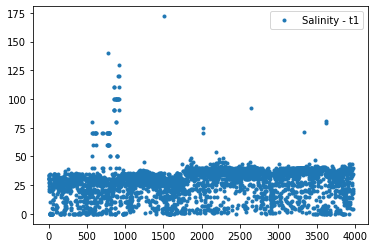

In [37]:
test_corr_df.plot(y='Salinity - t1', style='.');

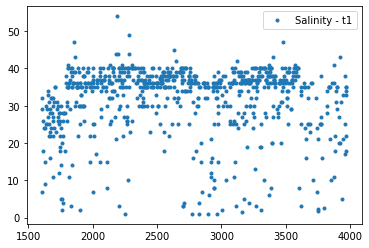

In [38]:
test_corr_df[test_corr_df['Tides: Incoming']].plot(y='Salinity - t1', style='.');

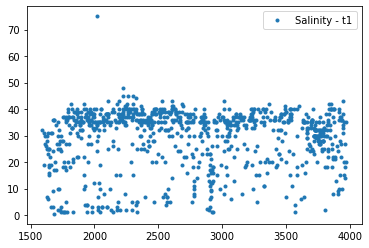

In [39]:
test_corr_df[test_corr_df['Tides: Outgoing']].plot(y='Salinity - t1', style='.');

In [40]:
test_corr_df[test_corr_df['Tides: Incoming']].describe()

,Salinity - t1
count,788.000000
mean,31.816815
std,9.272052
min,1.000000
25%,29.000000
50%,35.000000
75%,38.000000
max,54.000000


In [41]:
test_corr_df[~test_corr_df['Tides: Outgoing']].describe()

,Salinity - t1
count,3077.000000
mean,27.523927
std,14.334662
min,0.001000
25%,21.000000
50%,30.000000
75%,35.500000
max,172.000000


In [49]:
test_corr_df2 = test_corr_df[~np.logical_and(~test_corr_df['Tides: Outgoing'].values, ~test_corr_df['Tides: Incoming'].values)]

In [54]:
len(test_corr_df), len(test_corr_df2)

(3940, 1680)

In [51]:
test_corr_df2[test_corr_df2['Tides: Incoming']].describe()

,Salinity - t1,Salinity - t2
count,786.000000,786.000000
mean,31.822710,32.004008
std,9.278966,9.313015
min,1.000000,1.000000
25%,29.000000,29.000000
50%,35.000000,36.000000
75%,38.000000,38.000000
max,54.000000,55.000000


In [50]:
test_corr_df2[~test_corr_df2['Tides: Outgoing']].describe()

,Salinity - t1,Salinity - t2
count,786.000000,786.000000
mean,31.822710,32.004008
std,9.278966,9.313015
min,1.000000,1.000000
25%,29.000000,29.000000
50%,35.000000,36.000000
75%,38.000000,38.000000
max,54.000000,55.000000


In [55]:
test_corr_df[test_corr_df['Tides: Outgoing']].describe()

,Salinity - t1,Salinity - t2
count,894.000000,894.000000
mean,29.375783,29.432159
std,10.905211,10.922115
min,0.450000,0.000000
25%,24.000000,24.000000
50%,34.000000,34.000000
75%,37.000000,37.000000
max,75.000000,75.000000


In [52]:
test_corr_df2[test_corr_df2['Tides: Outgoing']].describe()

,Salinity - t1,Salinity - t2
count,894.000000,894.000000
mean,29.375783,29.432159
std,10.905211,10.922115
min,0.450000,0.000000
25%,24.000000,24.000000
50%,34.000000,34.000000
75%,37.000000,37.000000
max,75.000000,75.000000


In [56]:
test_corr_df[~test_corr_df['Tides: Incoming']].describe()

,Salinity - t1,Salinity - t2
count,3154.000000,3154.000000
mean,27.073368,27.105620
std,14.253831,14.265277
min,0.001000,0.000000
25%,20.000000,20.000000
50%,30.000000,30.000000
75%,35.000000,35.000000
max,172.000000,172.000000


In [57]:
test_corr_df2[~test_corr_df2['Tides: Incoming']].describe()

,Salinity - t1,Salinity - t2
count,894.000000,894.000000
mean,29.375783,29.432159
std,10.905211,10.922115
min,0.450000,0.000000
25%,24.000000,24.000000
50%,34.000000,34.000000
75%,37.000000,37.000000
max,75.000000,75.000000


<br><hr><br>

In [19]:
day_lo = pd.to_datetime("2005-07-30 00:00:00")
day_hi = pd.to_datetime("2005-07-31 00:00:00")
def day_test(dt_val):
    return dt_val >= day_lo and dt_val < day_hi

In [51]:
def show_diffs(row1, row2):
    for i, (x1, x2) in enumerate(zip(row1, row2)):
        try:
            nan_test = np.isnan(x1) and np.isnan(x2)
        except TypeError:
            # not float values
            nan_test = False
        if nan_test:
            continue
        elif x1 != x2:
            print(i, x1, "|||", x2)

In [24]:
test_day = scraped[scraped["EventDate"].apply(day_test)]

In [27]:
scraped.columns[9]

'Time spent sampling - minutes'

In [53]:
scraped.columns[88]

'Dissolved Oxygen - t1'

In [28]:
len(scraped.columns)

175

In [52]:
show_diffs(test_day.iloc[0], test_day.iloc[1])

0 3171 ||| 3172
9 60 ||| 120
16 True ||| False
17 False ||| True
20 nan ||| 1.0
21 nan ||| 24.0
74 True ||| False
83 24.5 ||| nan
84 25.0 ||| nan
85 6.5 ||| nan
86 6.5 ||| nan
88 5.5 ||| nan
89 5.5 ||| nan
99 39.0 ||| nan
101 0.0 ||| nan
102 0.0 ||| nan
129 False ||| True
132 nan ||| 0.0
133 False ||| True
134 False ||| True
137 False ||| True


In [55]:
dict(test_day.iloc[0])

{'Unnamed: 0': 3171,
 'Site': '[S-580]- Sandy  Creek',
 'Group': 'Group: [ G-747]- Sandy Creek Nature Center Volunteers',
 'County': 'County: Clarke',
 'EventDate': Timestamp('2005-07-30 00:00:00'),
 'TimeCollected-Hour': 10,
 'TimeCollected-Minute': 15,
 'TimeCollected-AMPM': 'AM',
 'number_participants': 5,
 'Time spent sampling - minutes': 60,
 'Total time spent traveling:': nan,
 'Furthest distance traveled:': nan,
 'Adopt-A-Stream monitors': nan,
 'Other participants': nan,
 'Heavy Rain': False,
 'Steady Rain': False,
 'Intermittent Rain': True,
 'Overcast': False,
 'Partly Cloudy': False,
 'Clear/Sunny': False,
 'Amount in inches': nan,
 'In Last': nan,
 'Hours': True,
 'Days': False,
 'Flow/Water Level: Dry': False,
 'Flow/Water Level: Stagnant/Still': False,
 'Flow/Water Level: Low': False,
 'Flow/Water Level: Normal': False,
 'Flow/Water Level: High': False,
 'Flow/Water Level: Flood (over banks)': False,
 'Tides: High': False,
 'Tides: Low': False,
 'Tides: Incoming': False,
